# RDS HW2 Template

Install the Data Synthesizer library.

In [1]:
!pip install DataSynthesizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']
    
    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [4]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']
    
    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [5]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)
    
    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [6]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'    
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'    
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas}) 
downloaded.GetContentFile(real_data_file)  
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake}) 
downloaded.GetContentFile(fake_data_file)  
df_fake = pd.read_csv(fake_data_file)

In [8]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json', 
                     'B': './descrption_B.json', 
                     'C': './descrption_C.json', 
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [25]:
# Your code here
# def analyse(data):
#   data[]

age_list_A = [df_real_A['age'].describe()['50%'], df_real_A['age'].describe()['mean'], df_real_A['age'].describe()['min'], df_real_A['age'].describe()['max']]
age_list_B = [df_real_B['age'].describe()['50%'], df_real_B['age'].describe()['mean'], df_real_B['age'].describe()['min'], df_real_B['age'].describe()['max']]
age_list_C = [df_real_C['age'].describe()['50%'], df_real_C['age'].describe()['mean'], df_real_C['age'].describe()['min'], df_real_C['age'].describe()['max']]
age_list_D = [df_real_D['age'].describe()['50%'], df_real_D['age'].describe()['mean'], df_real_D['age'].describe()['min'], df_real_D['age'].describe()['max']]
age_ground_truth = [df_real['age'].describe()['50%'], df_real['age'].describe()['mean'], df_real['age'].describe()['min'], df_real['age'].describe()['max']]
age_df = pd.DataFrame(data=[age_list_A,age_list_B,age_list_C,age_list_D,age_ground_truth], index=['A','B','C','D','groud truth'],columns=['Median','Mean','Min','Max'])

score_list_A = [df_real_A['score'].describe()['50%'], df_real_A['score'].describe()['mean'], df_real_A['score'].describe()['min'], df_real_A['score'].describe()['max']]
score_list_B = [df_real_B['score'].describe()['50%'], df_real_B['score'].describe()['mean'], df_real_B['score'].describe()['min'], df_real_B['score'].describe()['max']]
score_list_C = [df_real_C['score'].describe()['50%'], df_real_C['score'].describe()['mean'], df_real_C['score'].describe()['min'], df_real_C['score'].describe()['max']]
score_list_D = [df_real_D['score'].describe()['50%'], df_real_D['score'].describe()['mean'], df_real_D['score'].describe()['min'], df_real_D['score'].describe()['max']]
score_ground_truth = [df_real['score'].describe()['50%'], df_real['score'].describe()['mean'], df_real['score'].describe()['min'], df_real['score'].describe()['max']]
score_df = pd.DataFrame(data=[score_list_A,score_list_B,score_list_C,score_list_D,score_ground_truth], index=['A','B','C','D','groud truth'],columns=['Median','Mean','Min','Max'])
print("Age")
print(age_df)
print()
print("Score")
print(score_df)

Age
             Median       Mean   Min    Max
A              51.0  50.173100   0.0  100.0
B              33.0  35.735400  18.0   76.0
C              36.0  41.578800  18.0   96.0
D              39.0  44.153200  18.0   96.0
groud truth    32.0  35.143319  18.0   96.0

Score
             Median      Mean  Min   Max
A               5.0  4.939200 -1.0  10.0
B               4.0  4.365700  1.0  10.0
C               5.0  4.948700 -1.0  10.0
D               4.0  4.466000 -1.0  10.0
groud truth     4.0  4.371268 -1.0  10.0


### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

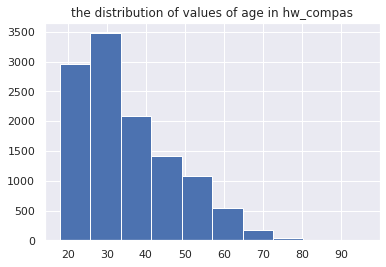

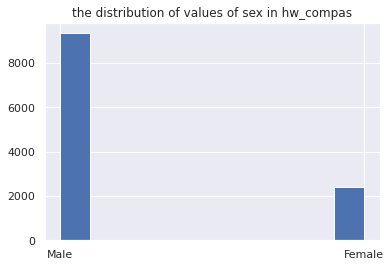

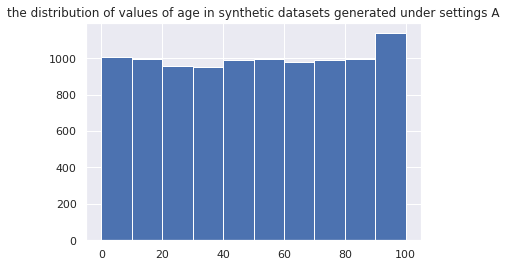

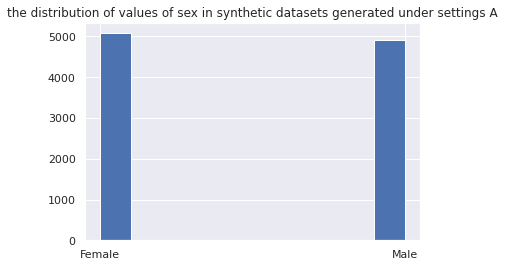

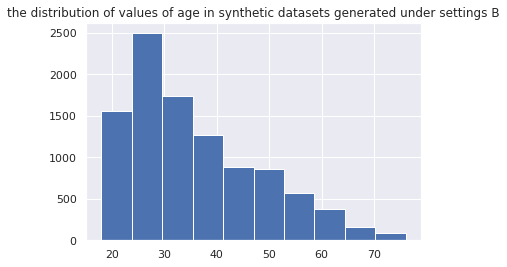

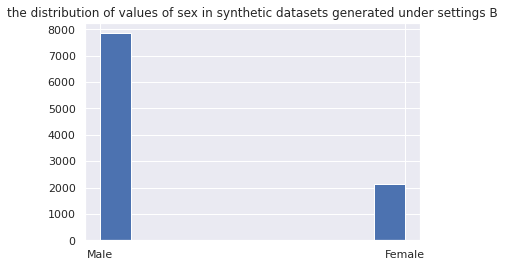

In [34]:
# Your code here
df_real['age'].hist()
plt.title("the distribution of values of age in hw_compas")
plt.show()

df_real['sex'].hist()
plt.title("the distribution of values of sex in hw_compas")
plt.show()

df_real_A['age'].hist()
plt.title("the distribution of values of age in synthetic datasets generated under settings A")
plt.show()

df_real_A['sex'].hist()
plt.title("the distribution of values of sex in synthetic datasets generated under settings A")
plt.show()

df_real_B['age'].hist()
plt.title("the distribution of values of age in synthetic datasets generated under settings B")
plt.show()

df_real_B['sex'].hist()
plt.title("the distribution of values of sex in synthetic datasets generated under settings B")
plt.show()

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [26]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [27]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [38]:
print("K-S test(age), hw_compas vs. A:")
print(ks_test(df_real, df_real_A, 'age'))
print("K-S test(age), hw_compas vs. B:")
print(ks_test(df_real, df_real_B, 'age'))

print("KL-divergence(sex), hw_compas vs. A:")
print(kl_test(df_real, df_real_A, 'sex'))
print("KL-divergence(sex), hw_compas vs. B:")
print(kl_test(df_real, df_real_B, 'sex'))

K-S test(age), hw_compas vs. A:
0.3735091775112699
K-S test(age), hw_compas vs. B:
0.026252445351705345
KL-divergence(sex), hw_compas vs. A:
0.22319792405369002
KL-divergence(sex), hw_compas vs. B:
0.0002494300869420041


### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

In [40]:
# Use pairwise_attributes_mutual_information function. 
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
# Your code here
mi_fake = pairwise_attributes_mutual_information(df_fake)
mi_C = pairwise_attributes_mutual_information(df_fake_C)
mi_D = pairwise_attributes_mutual_information(df_fake_D)
print(mi_fake)
print(mi_C)
print(mi_D)

           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.211242  0.214345  0.195899
child_2   0.211242  1.000000  0.208301  0.200690
parent_1  0.214345  0.208301  1.000000  0.002421
parent_2  0.195899  0.200690  0.002421  1.000000
           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.229400  0.070395  0.026739
child_2   0.229400  1.000000  0.249762  0.114695
parent_1  0.070395  0.249762  1.000000  0.028520
parent_2  0.026739  0.114695  0.028520  1.000000
           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.074153  0.034209  0.221418
child_2   0.074153  1.000000  0.203135  0.110479
parent_1  0.034209  0.203135  1.000000  0.073704
parent_2  0.221418  0.110479  0.073704  1.000000


<Axes: >

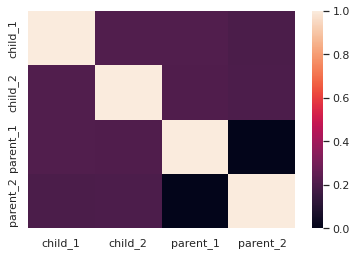

In [44]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Your code here
sns.heatmap(mi_fake, vmax=1, vmin=0)

<Axes: >

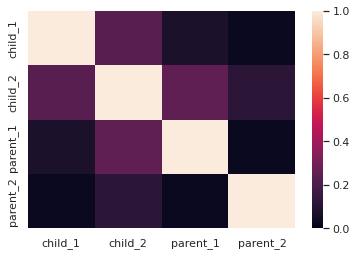

In [45]:
sns.heatmap(mi_C, vmax=1, vmin=0)

<Axes: >

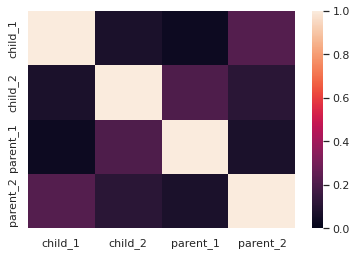

In [46]:
sns.heatmap(mi_D, vmax=1, vmin=0)

## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [52]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Your code here
import random
df_mean_median = pd.DataFrame([], columns=['dataset','mean','median'])
for i in range(10):
  seed = random.randint(0, 100000)
  set_random_seed(seed)
  df_real_A = generate_data_A(real_data_file, output_data_size)
  df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
  df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
  df_mean_median.loc[i*3] = ['A', df_real_A['age'].describe()['mean'], df_real_A['age'].describe()['50%']]
  df_mean_median.loc[i*3+1] = ['B', df_real_B['age'].describe()['mean'], df_real_B['age'].describe()['50%']]
  df_mean_median.loc[i*3+2] = ['C', df_real_C['age'].describe()['mean'], df_real_C['age'].describe()['50%']]

================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute sex
Adding attribute race
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute score
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute sex
Adding attribute race
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute age
Adding attribute race
Adding attribute score
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute sex
Adding attribu

<Axes: xlabel='dataset', ylabel='mean'>

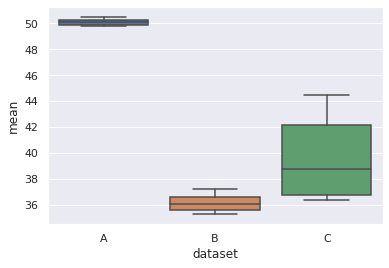

In [53]:
sns.boxplot(x="dataset", y="mean", data=df_mean_median)

<Axes: xlabel='dataset', ylabel='median'>

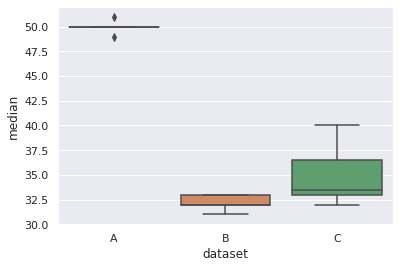

In [54]:
sns.boxplot(x="dataset", y="median", data=df_mean_median)

## Part (c)

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.02, 0.04, 0.06, 0.08, 0.1].

In [55]:
epsilons = [0.02, 0.04, 0.06, 0.08, 0.1]
df_KL = pd.DataFrame([], columns=['epsilon','B','C','D'])
n = 0
for i in range(10):
  seed = random.randint(0, 100000)
  set_random_seed(seed)
  for eps in epsilons:
    df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=eps)
    df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=eps)
    df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=eps)
    df_KL.loc[n] = [eps, kl_test(df_real, df_real_B, 'race'), kl_test(df_real, df_real_C, 'race'), kl_test(df_real, df_real_D, 'race')]
    n += 1

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute race
Adding attribute score
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute sex
Adding attribute score
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute sex
Adding attribute score
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute race
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute sex
Adding attrib

<Axes: xlabel='epsilon', ylabel='B'>

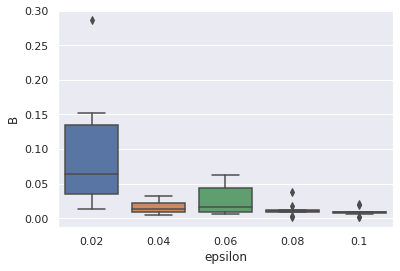

In [60]:
sns.boxplot(x="epsilon", y="B", data=df_KL)

<Axes: xlabel='epsilon', ylabel='C'>

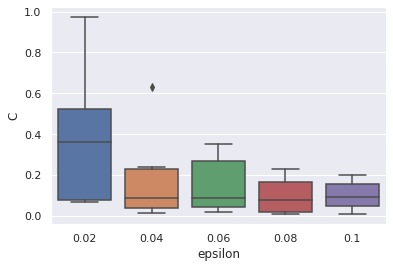

In [61]:
sns.boxplot(x="epsilon", y="C", data=df_KL)

<Axes: xlabel='epsilon', ylabel='D'>

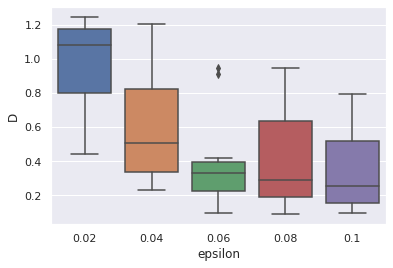

In [62]:
sns.boxplot(x="epsilon", y="D", data=df_KL)